In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv('DataSet_1_Dirty_2.11.2022 v5 (numerics grouped).csv')

In [3]:
df = df.drop('email_address', 1)

/var/folders/9j/sb9k3k3n66dgyqgmnmvbft8w0000gn/T/ipykernel_71657/3409819096.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('email_address', 1)


In [4]:
df

,sex,country,region,city,contact_number,income_source,Age,Days_being_customer,Ratio_2w_to_week,Net Deposit Dec 2021,Month of January
0,Male,PH,Metro Manila,Parañaque,6.390000e+11,Practice of Profession,36,401,0.000000,0.0,0
1,Male,AE,al karama,Dubai,9.710000e+12,salary,30,401,0.000000,0.0,0
2,male,PH,Nueva Vizcaya,Solano,9.395438e+09,others Allowance,23,395,0.153846,-26375.0,1
3,female,PH,Cebu,Cebu,9.209720e+09,others Salary,34,343,0.000000,0.0,0
4,Male,PH,camarines norte,daet,6.400000e+11,buy and sell used gadgets,39,177,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
25892,Female,PH,Pampanga,San Fernando,6.400000e+11,Allowance,21,90,0.000000,0.0,0
25893,Female,PH,Nueva Ecija,Llanera,6.400000e+11,Remittance,31,182,0.000000,0.0,0
25894,Male,QA,Doha,Doha,6.390000e+11,Compensation,43,252,0.000000,0.0,0
25895,Male,PH,muntinlupa,muntinlupa,6.390000e+11,Business,27,98,0.000000,0.0,0


In [5]:
#Reversing the Y_target
df.rename(columns={"Month of January": "y_actual"}, inplace=True)

In [6]:
df["y_actual"] = ~df["y_actual"].astype(bool)

In [7]:
df

,sex,country,region,city,contact_number,income_source,Age,Days_being_customer,Ratio_2w_to_week,Net Deposit Dec 2021,y_actual
0,Male,PH,Metro Manila,Parañaque,6.390000e+11,Practice of Profession,36,401,0.000000,0.0,True
1,Male,AE,al karama,Dubai,9.710000e+12,salary,30,401,0.000000,0.0,True
2,male,PH,Nueva Vizcaya,Solano,9.395438e+09,others Allowance,23,395,0.153846,-26375.0,False
3,female,PH,Cebu,Cebu,9.209720e+09,others Salary,34,343,0.000000,0.0,True
4,Male,PH,camarines norte,daet,6.400000e+11,buy and sell used gadgets,39,177,0.000000,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...
25892,Female,PH,Pampanga,San Fernando,6.400000e+11,Allowance,21,90,0.000000,0.0,True
25893,Female,PH,Nueva Ecija,Llanera,6.400000e+11,Remittance,31,182,0.000000,0.0,True
25894,Male,QA,Doha,Doha,6.390000e+11,Compensation,43,252,0.000000,0.0,True
25895,Male,PH,muntinlupa,muntinlupa,6.390000e+11,Business,27,98,0.000000,0.0,True


In [8]:
X = df.loc[:, "Age":'Net Deposit Dec 2021']
y = df['y_actual']

In [9]:
X.head()

,Age,Days_being_customer,Ratio_2w_to_week,Net Deposit Dec 2021
0,36,401,0.000000,0.0
1,30,401,0.000000,0.0
2,23,395,0.153846,-26375.0
3,34,343,0.000000,0.0
4,39,177,0.000000,0.0


In [10]:
y.head()

0     True
1     True
2    False
3     True
4     True
Name: y_actual, dtype: bool

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
np.mean(y_train)

0.740696046724912

help(RandomForestClassifier)

In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth = 3)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [14]:
model.score(X_test, y_test)

0.7801158301158301

In [15]:
model.score(X_train, y_train)

0.7881450016894338

In [16]:
#help(RandomForestClassifier)

In [17]:
cm_test = confusion_matrix(y_test, model.predict(X_test))
cm_test

array([[ 554,  813],
       [ 326, 3487]])

In [18]:
cm_train = confusion_matrix(y_train, model.predict(X_train))
cm_train

array([[ 2313,  3059],
       [ 1330, 14015]])

In [19]:
r_train = recall_score(y_train, model.predict(X_train))
r_train

0.913326816552623

In [20]:
p_train = precision_score(y_train, model.predict(X_train))
p_train

0.8208387021201827

In [21]:
r_test = recall_score(y_test, model.predict(X_test))
r_test

0.914503015997902

In [22]:
p_test = precision_score(y_test, model.predict(X_test))
p_test

0.8109302325581396

/Users/lisun/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


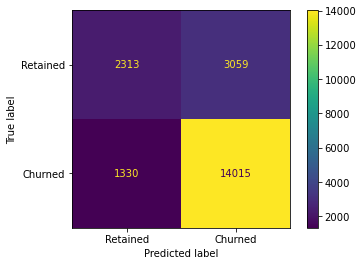

In [25]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,
                      X_train,
                      y_train,
                      values_format='d',
                      display_labels = ["Retained", "Churned"])

/Users/lisun/opt/anaconda3/envs/metis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


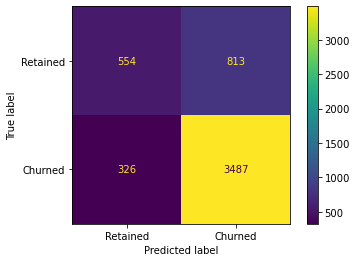

In [28]:
plot_confusion_matrix(model,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels = ["Retained", "Churned"])

In [31]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

       False       0.63      0.43      0.51      5372
        True       0.82      0.91      0.86     15345

    accuracy                           0.79     20717
   macro avg       0.73      0.67      0.69     20717
weighted avg       0.77      0.79      0.77     20717



In [32]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

       False       0.63      0.41      0.49      1367
        True       0.81      0.91      0.86      3813

    accuracy                           0.78      5180
   macro avg       0.72      0.66      0.68      5180
weighted avg       0.76      0.78      0.76      5180

